# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("zombies.csv")
df

,zombieid,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,1,Human,18,Female,Rural,1,0,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
1,2,Human,18,Male,Rural,3,24,Food,Medication,tools,First aid supplies,Sanitation,Clothing,NaN
2,3,Human,18,Male,Rural,4,16,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
3,4,Human,19,Male,Rural,1,0,Food,Medication,tools,No first aid supplies,Sanitation,Clothing,NaN
4,5,Human,19,Male,Urban,1,0,Food,Medication,No tools,First aid supplies,Sanitation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Zombie,68,Male,Suburban,1,0,Food,No medication,No tools,No first aid supplies,Sanitation,Clothing,Documents
196,197,Zombie,71,Male,Suburban,1,8,No food,No medication,tools,First aid supplies,No sanitation,Clothing,NaN
197,198,Zombie,76,Female,Urban,1,0,No food,No medication,tools,First aid supplies,Sanitation,Clothing,Documents
198,199,Zombie,82,Male,Urban,1,0,No food,No medication,No tools,No first aid supplies,No sanitation,NaN,NaN


In [3]:
df.isnull().sum()

zombieid        0
zombie          0
age             0
sex             0
rurality        0
household       0
water           0
food            0
medication      0
tools           0
firstaid        0
sanitation      0
clothing       74
documents     134
dtype: int64

In [4]:
df.shape

(200, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zombieid    200 non-null    int64 
 1   zombie      200 non-null    object
 2   age         200 non-null    int64 
 3   sex         200 non-null    object
 4   rurality    200 non-null    object
 5   household   200 non-null    int64 
 6   water       200 non-null    int64 
 7   food        200 non-null    object
 8   medication  200 non-null    object
 9   tools       200 non-null    object
 10  firstaid    200 non-null    object
 11  sanitation  200 non-null    object
 12  clothing    126 non-null    object
 13  documents   66 non-null     object
dtypes: int64(4), object(10)
memory usage: 22.0+ KB


# Visualisations

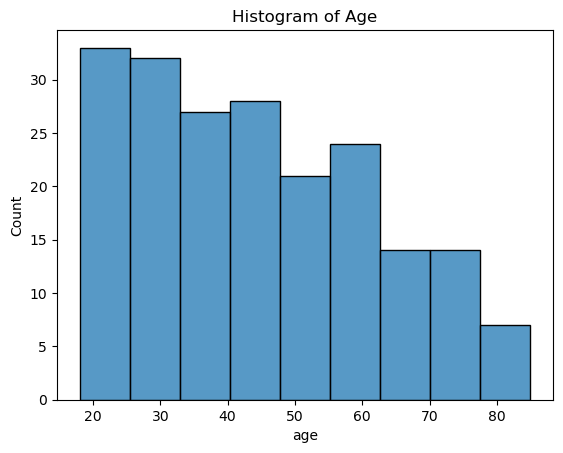

In [6]:
# Univariate Analysis
# 1. Histogram
sns.histplot(df['age'])
plt.title('Histogram of Age')
plt.show()

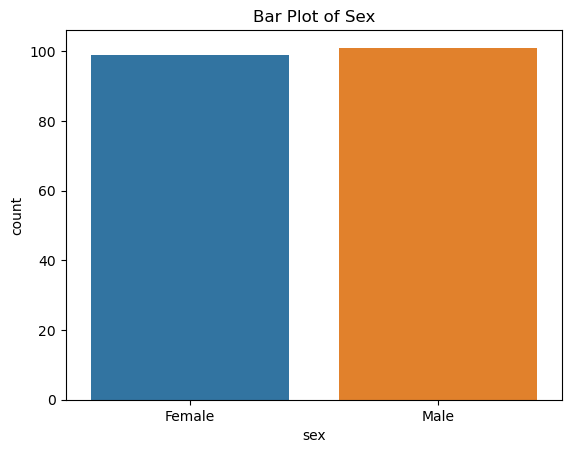

In [7]:
# 2. Bar Plot
sns.countplot(x='sex', data=df)
plt.title('Bar Plot of Sex')
plt.show()

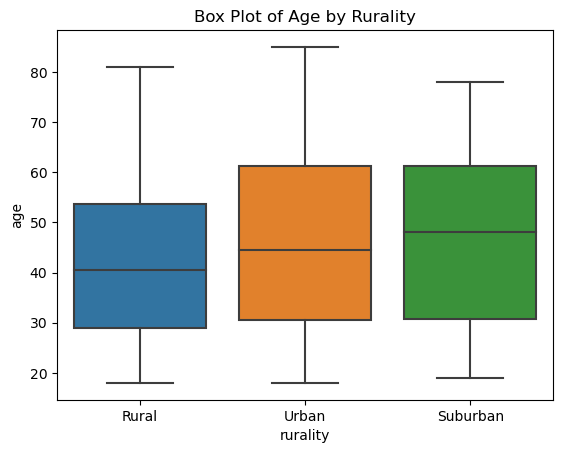

In [8]:
# Bivariate Analysis
# 1. Box Plot
sns.boxplot(x='rurality', y='age', data=df)
plt.title('Box Plot of Age by Rurality')
plt.show()

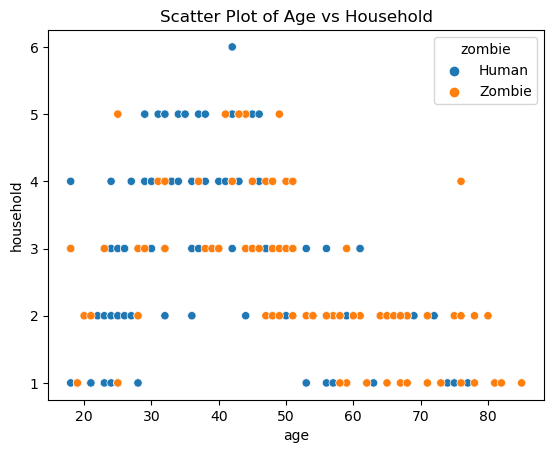

In [9]:
# 2. Scatter Plot
sns.scatterplot(x='age', y='household', hue='zombie', data=df)
plt.title('Scatter Plot of Age vs Household')
plt.show()

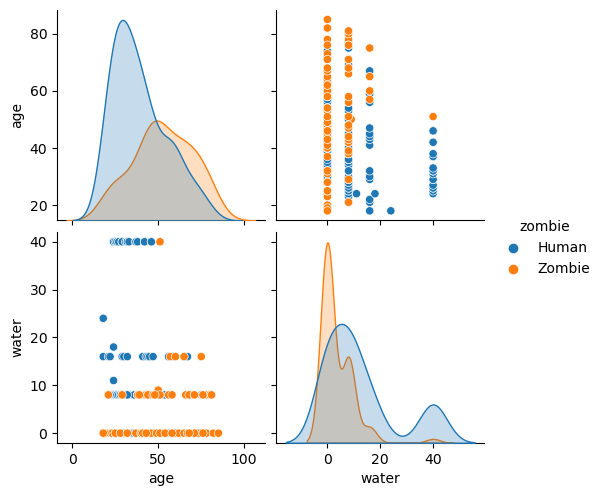

In [10]:
# Multivariate Analysis
# 1. Pair Plot
sns.pairplot(df[['age', 'water', 'food', 'zombie']], hue='zombie')
plt.show()

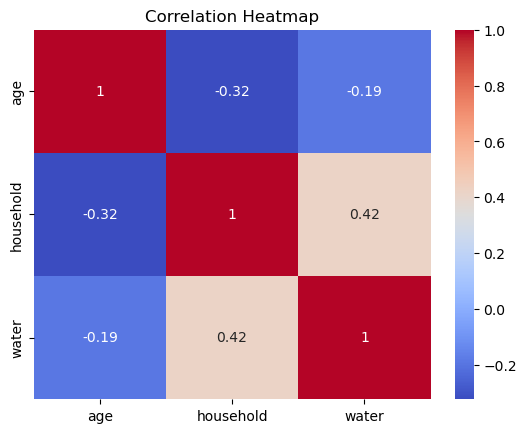

In [11]:
# 2. Heatmap
correlation_matrix = df[['age', 'household', 'water', 'zombie']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Cleansing and Analysing

In [12]:
# In the dataset it show Documents and No documents but here nan values are No documents and same thing applies to clothing 
# So we'll replace nan to the respective categorical column

df['documents'].fillna("No Documents", inplace=True)
df['clothing'].fillna("No Clothing", inplace=True)

In [13]:
df['zombie'].value_counts()

Human     121
Zombie     79
Name: zombie, dtype: int64

In [14]:
79/121

0.6528925619834711

In [15]:
df['water/person'] = (df['water'] / df['household']).astype(int)

In [16]:
df.head()

,zombieid,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents,water/person
0,1,Human,18,Female,Rural,1,0,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,No Documents,0
1,2,Human,18,Male,Rural,3,24,Food,Medication,tools,First aid supplies,Sanitation,Clothing,No Documents,8
2,3,Human,18,Male,Rural,4,16,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,No Documents,4
3,4,Human,19,Male,Rural,1,0,Food,Medication,tools,No first aid supplies,Sanitation,Clothing,No Documents,0
4,5,Human,19,Male,Urban,1,0,Food,Medication,No tools,First aid supplies,Sanitation,No Clothing,No Documents,0


In [17]:
df.describe()

,zombieid,age,household,water,water/person
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,44.415000,2.680000,8.750000,3.015000
std,57.879185,17.371865,1.263162,12.069626,3.611091
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,50.750000,29.000000,2.000000,0.000000,0.000000
50%,100.500000,42.000000,2.500000,8.000000,2.000000
75%,150.250000,58.000000,4.000000,8.000000,5.000000
max,200.000000,85.000000,6.000000,40.000000,13.000000


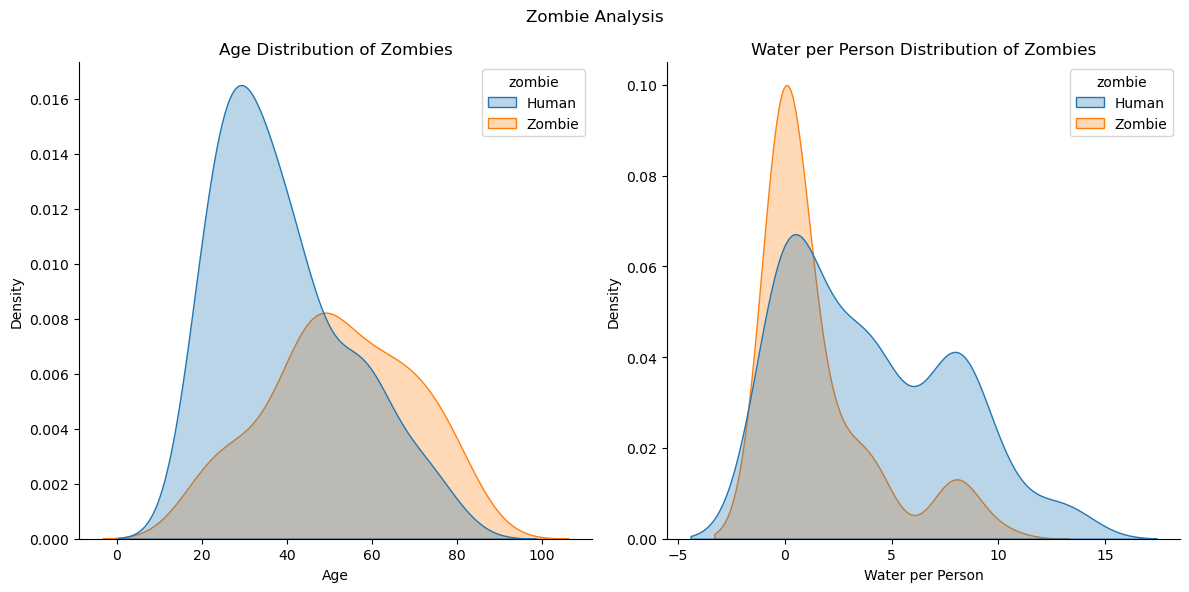

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Zombie Analysis')

axes[0].set_title('Age Distribution of Zombies')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
sns.despine(ax=axes[0])
sns.kdeplot(data=df, x='age', hue='zombie', fill=True, alpha=0.3, ax=axes[0])

axes[1].set_title('Water per Person Distribution of Zombies')
axes[1].set_xlabel('Water per Person')
axes[1].set_ylabel('Density')
sns.despine(ax=axes[1])
sns.kdeplot(data=df, x='water/person', hue='zombie', fill=True, alpha=0.3, ax=axes[1])

plt.tight_layout()
plt.show()

# We found that older people are mostly tend to become zombies and if people had lower water/person then they tend to become zombies

In [19]:
# Lets check the relationship for the categorical variables

zombies_factors = df.select_dtypes(include='object')

def get_percentage_zombies(column):
    return pd.crosstab(column, df['zombie'], normalize='index')
perc_zombies = {col: get_percentage_zombies(zombies_factors[col]) for col in zombies_factors.columns}
for col, data in perc_zombies.items():
    print(f"Column: {col}\n")
    print(data)
    print()

Column: zombie

zombie  Human  Zombie
zombie               
Human     1.0     0.0
Zombie    0.0     1.0

Column: sex

zombie     Human    Zombie
sex                       
Female  0.626263  0.373737
Male    0.584158  0.415842

Column: rurality

zombie       Human    Zombie
rurality                    
Rural     0.816327  0.183673
Suburban  0.520833  0.479167
Urban     0.296296  0.703704

Column: food

zombie      Human    Zombie
food                       
Food     0.827273  0.172727
No food  0.333333  0.666667

Column: medication

zombie            Human    Zombie
medication                       
Medication     0.829787  0.170213
No medication  0.405660  0.594340

Column: tools

zombie       Human    Zombie
tools                       
No tools  0.603960  0.396040
tools     0.606061  0.393939

Column: firstaid

zombie                    Human    Zombie
firstaid                                 
First aid supplies     0.632075  0.367925
No first aid supplies  0.574468  0.425532

Column

70% of zombies are from urban and 18% of zombie from rural here the rurality has some relationship toward the target variable

66% of people became zombie with no food supplies and 82% stayed human with food supplies so it has relationship toward the target variable

With medication 82% stayed human and without medication 60% turned zombies so it has relation

Let's use Chi-square test to find the relation statistically

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

# Update subset of factors
zombies_factors = df.select_dtypes(include='object')

# Chi-squared for categorical feature
chi_zombies = {col: chi2_contingency(pd.crosstab(zombies_factors[col], df['zombie'])) for col in zombies_factors.columns}

# T-tests for numeric features
ttest_age = ttest_ind(df.loc[df['zombie'] == 'Human', 'age'], df.loc[df['zombie'] == 'Zombie', 'age'])
ttest_water = ttest_ind(df.loc[df['zombie'] == 'Human', 'water/person'], df.loc[df['zombie'] == 'Zombie', 'water/person'])

# Examine the results
for col, result in chi_zombies.items():
    print(f"Chi-squared test for column: {col}")
    print(f"Chi-squared statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print()

print("T-test for age")
print(f"T-statistic: {ttest_age.statistic}")
print(f"P-value: {ttest_age.pvalue}")
print()

print("T-test for water/person")
print(f"T-statistic: {ttest_water.statistic}")
print(f"P-value: {ttest_water.pvalue}")
print()


Chi-squared test for column: zombie
Chi-squared statistic: 195.83734981761486
P-value: 1.6914614508255057e-44

Chi-squared test for column: sex
Chi-squared statistic: 0.21561105791508034
P-value: 0.642404615632073

Chi-squared test for column: rurality
Chi-squared statistic: 41.270829681153536
P-value: 1.0918254239553111e-09

Chi-squared test for column: food
Chi-squared statistic: 48.49013199259043
P-value: 3.319550580750276e-12

Chi-squared test for column: medication
Chi-squared statistic: 35.747219123692034
P-value: 2.246524119978906e-09

Chi-squared test for column: tools
Chi-squared statistic: 0.0
P-value: 1.0

Chi-squared test for column: firstaid
Chi-squared statistic: 0.47178105643125123
P-value: 0.49216893843204057

Chi-squared test for column: sanitation
Chi-squared statistic: 14.610225301544407
P-value: 0.00013219530307131107

Chi-squared test for column: clothing
Chi-squared statistic: 0.26863801317196
P-value: 0.604246871142675

Chi-squared test for column: documents
Chi-

If p<0.05 (5%) then that feature has strong relationship so here for numeric from density plot and from T-test we found that age and water/person have high relation

For Categorical feature rurality,food,medication,sanitation have strong relationships

So we take these feature while building the model

In [21]:
df.drop(columns=['zombieid','sex','household','water','tools','firstaid','clothing','documents'],inplace = True)
df.head()

,zombie,age,rurality,food,medication,sanitation,water/person
0,Human,18,Rural,Food,Medication,Sanitation,0
1,Human,18,Rural,Food,Medication,Sanitation,8
2,Human,18,Rural,Food,Medication,Sanitation,4
3,Human,19,Rural,Food,Medication,Sanitation,0
4,Human,19,Urban,Food,Medication,Sanitation,0


In [22]:
X = pd.get_dummies(df.iloc[:,1:])
y = df.iloc[:,0]

In [23]:
X

,age,water/person,rurality_Rural,rurality_Suburban,rurality_Urban,food_Food,food_No food,medication_Medication,medication_No medication,sanitation_No sanitation,sanitation_Sanitation
0,18,0,1,0,0,1,0,1,0,0,1
1,18,8,1,0,0,1,0,1,0,0,1
2,18,4,1,0,0,1,0,1,0,0,1
3,19,0,1,0,0,1,0,1,0,0,1
4,19,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,68,0,0,1,0,1,0,0,1,0,1
196,71,8,0,1,0,0,1,0,1,1,0
197,76,0,0,0,1,0,1,0,1,0,1
198,82,0,0,0,1,0,1,0,1,1,0


In [24]:
y

0       Human
1       Human
2       Human
3       Human
4       Human
        ...  
195    Zombie
196    Zombie
197    Zombie
198    Zombie
199    Zombie
Name: zombie, Length: 200, dtype: object

# Oversampling the dataset (SMOTE)

In [25]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE oversampling technique
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

merged_df = pd.concat([X_resampled, y_resampled], axis=1)
merged_df

,age,water/person,rurality_Rural,rurality_Suburban,rurality_Urban,food_Food,food_No food,medication_Medication,medication_No medication,sanitation_No sanitation,sanitation_Sanitation,zombie
0,18,0,1,0,0,1,0,1,0,0,1,Human
1,18,8,1,0,0,1,0,1,0,0,1,Human
2,18,4,1,0,0,1,0,1,0,0,1,Human
3,19,0,1,0,0,1,0,1,0,0,1,Human
4,19,0,0,0,1,1,0,1,0,0,1,Human
...,...,...,...,...,...,...,...,...,...,...,...,...
237,77,4,0,0,0,0,1,0,0,0,0,Zombie
238,47,0,0,0,0,0,1,0,0,1,0,Zombie
239,66,0,0,0,1,0,0,0,0,0,0,Zombie
240,46,0,0,0,1,0,0,1,0,1,0,Zombie


In [26]:
X = merged_df.iloc[:,:-1]
y = merged_df.iloc[:,-1]

In [27]:
X

,age,water/person,rurality_Rural,rurality_Suburban,rurality_Urban,food_Food,food_No food,medication_Medication,medication_No medication,sanitation_No sanitation,sanitation_Sanitation
0,18,0,1,0,0,1,0,1,0,0,1
1,18,8,1,0,0,1,0,1,0,0,1
2,18,4,1,0,0,1,0,1,0,0,1
3,19,0,1,0,0,1,0,1,0,0,1
4,19,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
237,77,4,0,0,0,0,1,0,0,0,0
238,47,0,0,0,0,0,1,0,0,1,0
239,66,0,0,0,1,0,0,0,0,0,0
240,46,0,0,0,1,0,0,1,0,1,0


In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train.shape

(193, 11)

In [31]:
X_test.shape

(49, 11)

In [32]:
y_train.shape

(193,)

In [33]:
y_test.shape

(49,)

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.fit_transform(X_test)

In [35]:
X_train

array([[ 0.81532158, -0.77728831,  1.16346832, ..., -1.10380741,
        -1.02625118, -0.82356595],
       [-0.5065018 ,  2.04788388,  1.16346832, ..., -1.10380741,
        -1.02625118,  1.21423185],
       [ 1.95689633,  0.35278057, -0.85949912, ...,  0.90595514,
         0.97442031, -0.82356595],
       ...,
       [ 1.77664768,  1.48284944,  1.16346832, ...,  0.90595514,
         0.97442031, -0.82356595],
       [-0.80691621,  2.89543554,  1.16346832, ...,  0.90595514,
        -1.02625118,  1.21423185],
       [ 0.21449277, -0.77728831,  1.16346832, ...,  0.90595514,
         0.97442031, -0.82356595]])

In [36]:
X_test

array([[ 0.89522689,  1.67333197,  1.31233465, -0.69631062, -0.63245553,
         1.10782342, -1.02062073, -0.8660254 ,  0.94053994,  1.06321907,
        -0.9797959 ],
       [ 0.94547445,  0.43569776, -0.76200076, -0.69631062,  1.58113883,
        -0.90267093,  0.9797959 , -0.8660254 ,  0.94053994,  1.06321907,
        -0.9797959 ],
       [-0.91368518,  0.43569776,  1.31233465, -0.69631062, -0.63245553,
         1.10782342, -1.02062073, -0.8660254 ,  0.94053994, -0.94053994,
         1.02062073],
       [-0.26046693, -0.18311935,  1.31233465, -0.69631062, -0.63245553,
         1.10782342, -1.02062073, -0.8660254 ,  0.94053994,  1.06321907,
        -0.9797959 ],
       [ 0.79473178, -0.80193645,  1.31233465, -0.69631062, -0.63245553,
         1.10782342, -1.02062073,  1.15470054, -1.06321907, -0.94053994,
         1.02062073],
       [-0.36096205, -0.80193645, -0.76200076,  1.43614066, -0.63245553,
         1.10782342, -1.02062073,  1.15470054, -1.06321907, -0.94053994,
         1.020

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LR = LogisticRegression()
y_pred = LR.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.91      0.80      0.85        25

    accuracy                           0.86        49
   macro avg       0.86      0.86      0.86        49
weighted avg       0.86      0.86      0.86        49



In [38]:
from sklearn.svm import SVC
SV_L = SVC(kernel='linear')
y_pred = SV_L.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.91      0.80      0.85        25

    accuracy                           0.86        49
   macro avg       0.86      0.86      0.86        49
weighted avg       0.86      0.86      0.86        49



In [39]:
from sklearn.svm import SVC
SV_K = SVC(kernel='rbf')
y_pred = SV_K.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.87      0.80      0.83        25

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



In [40]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
y_pred = KNN.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.83      0.80      0.82        25

    accuracy                           0.82        49
   macro avg       0.82      0.82      0.82        49
weighted avg       0.82      0.82      0.82        49



In [41]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
y_pred = NB.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.87      0.80      0.83        25

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



In [42]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy',random_state=0)
y_pred = DTC.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.75      0.72      0.73        25

    accuracy                           0.73        49
   macro avg       0.73      0.73      0.73        49
weighted avg       0.74      0.73      0.73        49



In [43]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
y_pred = RFC.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        24
           1       0.89      0.64      0.74        25

    accuracy                           0.78        49
   macro avg       0.80      0.78      0.77        49
weighted avg       0.80      0.78      0.77        49



# Hyper-parameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.25, 0.5, 0.75, 1],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

GS = GridSearchCV(estimator = LR, param_grid = parameters,scoring = 'accuracy',cv=10,n_jobs = -1) #n_jobs uses all the processor in ur computer
GS.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [45]:
best_accuracy = GS.best_score_
best_parameters = GS.best_params_
print("Best Accuracy : {:.2f} %".format(best_accuracy*100))
print("Best Paramters : ",best_parameters)

Best Accuracy : 89.21 %
Best Paramters :  {'C': 0.5, 'class_weight': None, 'fit_intercept': False, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

GS = GridSearchCV(estimator=SV_L, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
GS.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'], 'kernel': ['linear']},
             scoring='accuracy')

In [47]:
best_accuracy = GS.best_score_
best_parameters = GS.best_params_
print("Best Accuracy : {:.2f} %".format(best_accuracy*100))
print("Best Paramters : ",best_parameters)

Best Accuracy : 88.21 %
Best Paramters :  {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}


# Model Building

In [48]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.5,class_weight=None,fit_intercept = False,max_iter = 100,multi_class="auto",penalty = "l1",solver = "liblinear",random_state=0)
LR.fit(X_train,y_train)

LogisticRegression(C=0.5, fit_intercept=False, penalty='l1', random_state=0,
                   solver='liblinear')

In [49]:
y_pred = LR.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1])

# Metrics

In [50]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

#Side by side view of predicted vs original value

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.8775510204081632

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.91      0.84      0.87        25

    accuracy                           0.88        49
   macro avg       0.88      0.88      0.88        49
weighted avg       0.88      0.88      0.88        49



In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

AUC: 0.8783333333333333


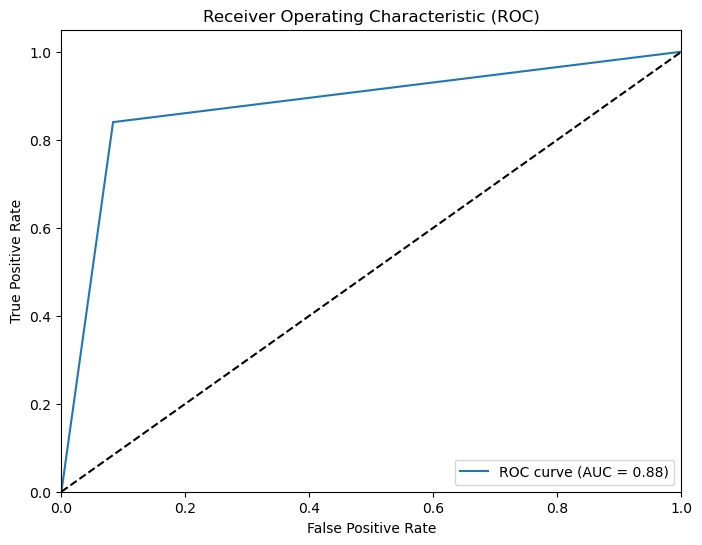

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [55]:
confusion_matrix(y_test,y_pred)

array([[22,  2],
       [ 4, 21]], dtype=int64)

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train,cv=10) #cv is no of folds
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()))

Accuracy : 89.21 %
Standard Deviation : 0.08 %


# Single Prediction

In [57]:
#Let's predict for a person of age 69 and has access to water is 5L and who lives in suburban and has no food but have acces to medication and sanitation

if LR.predict(SS.transform([[69,5,0,1,0,0,1,1,0,1,0]])) == 1:
    print("Zombie")
else:
    print("Human")

Zombie


# Model Deployment

In [41]:
import pickle
pickle.dump(LR,open("model.pkl","wb"))

In [42]:
pickle.dump(SS, open("scaler.pkl", "wb"))